https://www.geeksforgeeks.org/decision-tree-introduction-example/

https://www.geeksforgeeks.org/decision-tree/

https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53

https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/



In [1]:
# Import the necessary libraries
from sklearn.datasets import load_diabetes, load_iris, make_classification
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from graphviz import Source
from sklearn import tree
from sklearn.model_selection import train_test_split

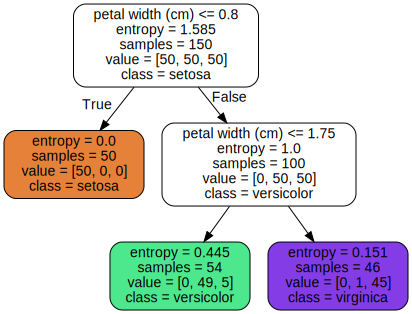

In [2]:


# Load the dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',
								max_depth=2)
tree_clf.fit(X, y)

# Plot the decision tree graph
export_graphviz(
	tree_clf,
	out_file="iris_tree.dot",
	feature_names=iris.feature_names[2:],
	class_names=iris.target_names,
	rounded=True,
	filled=True
)

with open("iris_tree.dot") as f:
	dot_graph = f.read()

Source(dot_graph)


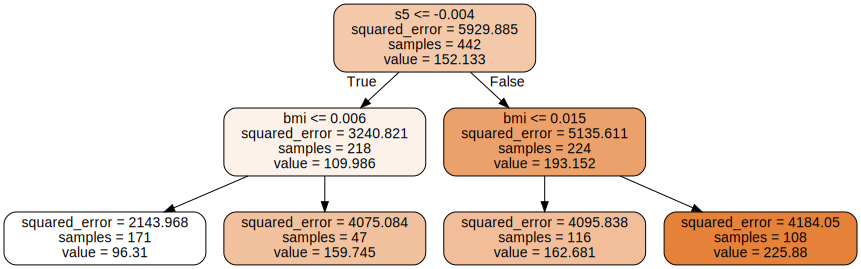

In [3]:
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
								max_depth=2)

tree_reg.fit(X, y)

# Plot the decision tree graph
export_graphviz(
	tree_reg,
	out_file="diabetes_tree.dot",
	feature_names=diabetes.feature_names,
	class_names=diabetes.target,
	rounded=True,
	filled=True
)

with open("diabetes_tree.dot") as f:
	dot_graph = f.read()
	
Source(dot_graph)



[0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0]
31
39
Gini : 0.4934693877551021
Accuracy is:  0.8666666666666667


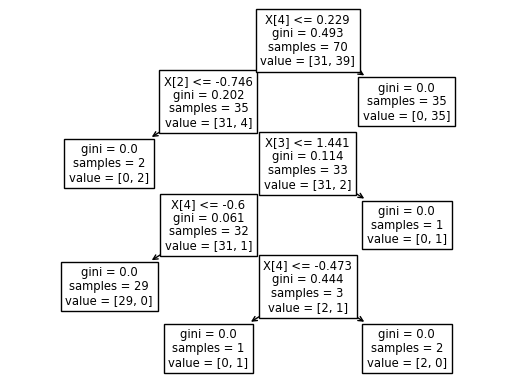

In [4]:
X, t = make_classification(100, 5, n_classes=2, shuffle=True, random_state=10)
X_train, X_test, t_train, t_test = train_test_split(
	X, t, test_size=0.3, shuffle=True, random_state=1)

model = DecisionTreeClassifier()
model = model.fit(X_train, t_train)

predicted_value = model.predict(X_test)
print(predicted_value)

plot_tree(model)

zeroes = 0
ones = 0
for i in range(0, len(t_train)):
	if t_train[i] == 0:
		zeroes += 1
	else:
		ones += 1

print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)

match = 0
UnMatch = 0

for i in range(30):
	if predicted_value[i] == t_test[i]:
		match += 1
	else:
		UnMatch += 1

accuracy = match/30
print("Accuracy is: ", accuracy)
